# INTRODUCTION

* MNIST database of handwritten digits the [dataset is found here] (http://yann.lecun.com/exdb/mnist/)

* Create a Convolutional Neural Network (CNN or convnet)[wikipedia discussion on convnet] (https://en.wikipedia.org/wiki/Convolutional_neural_network)



* Common in Computer-vision applications

 + Recognizing handwritten digits and characters

 + Recognizing objects in images and video

 + Self-driving cars

 * Non-vision applications

 + Natural-language processing

 + Recommender systems

 + Much more


Before fitting the model, we need to configure the tensorboard object (tensorflow.keras.callbacks) - this is the one that the model uses to write into a specified folder that the tensorboard monitors.

# The Dataset

* 60,000 labeled '(supervised)' digit image sample for training and 10,000 for testing

* The data is a 28 by 28 pixel images (784 features), represented as an Numpy Array
* Grayscale pixel intensity (shade) -- 0 - 255
* In Convonet we use the idea of probabilistic classification 
    + Model will output 10 probabilities - this is likehood for 0 - 9
    + Highest probability is the predicted value

# Keras and Deep Learning

* Reproducabilty is difficult since the libraries tend to parallize floating point calculations.

* Each time calculations execute the execution is in a diffrent order.

* Produce diffrent resuts in each execution

# Building the Network (Model)

* Sequence of layers containing the neurons used to learn from the samples .

* Each layer will receive input, process the input,,,(activation function) and produce the results.

* The more the layers you stack, the depper the network --  deep learining

* Loss function -> Produces a  measure if how well the network predicts the target values. The lower thw value of the loss the better the predictions.

* Optimizer minimize the values produced by the loss function to ~tune the netwwork~ to make batter predictions


# Loading the MNIST Data

In [1]:
from tensorflow.keras.datasets import mnist 

C:\Users\Wamaitha\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Wamaitha\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Wamaitha\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Wamaitha\anaconda3\envs\tf_env\lib\site-packages\ten

In [2]:
# Load the data as training and testing
(x_train,y_train), (x_test,y_test) = mnist.load_data()


In [3]:
# Chacking the dimensions of the data 

x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

 # Visualizing the Digits

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

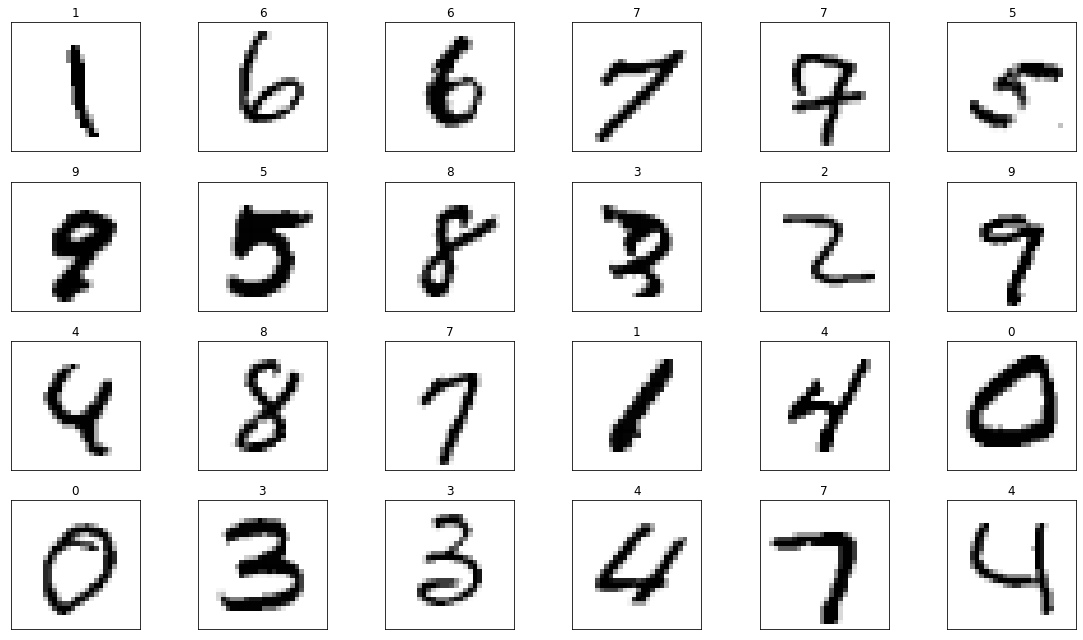

In [8]:
index=np.random.choice(np.arange(len(x_train)), 24, replace=False)
figure,axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))
for item in zip(axes.ravel(), x_train[index], y_train[index]):
     axes, image,target=item
     axes.imshow(image, cmap=plt.cm.gray_r)
     axes.set_xticks([]) # removes the x-ticks marks
     axes.set_yticks([]) # remove the y-ticks marks
     axes.set_title(target)

plt.tight_layout()

* Handwritten Digits recognistion is an intresting problem

# Data Prepation

* Scikit-learn the dataset are bundled and are preprocessed in a shape for the model to be used in.
* For keras convonet the dataset MNIST will need to be prepared.

* The data needs to be reshaped.

* Keras  --- numpy array as input.
* Each sample must have the shape

    *(width, height, channel) -- Watch pixel has one channel for the grayscale 0-255 that sample shades are (28,28,1)*
    
    
* As the NN lears from the images the image. it creates more channel
    + The Channel will represent more complex (edges, curves, lines)
    + We need to enable the network to regocnise digit based on the features and how they are combined.




# Reshaping the Image Data

With numpy array method the reshape receives a tuple represent the new shape

In [9]:
x_train=x_train.reshape((60000,28,28,1))

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_test=x_test.reshape((10000,28,28,1))

In [12]:
x_test.shape

(10000, 28, 28, 1)

#  Normalizating the Image Data

Numeric feature values -> could vary widely.
$28*28 = 784$ === Deep Learning performs better on data that is normalized.
* 0.0 - 1.0
* A range for which the data mean is 0.0 and SD is 1.0
=> Divide each pixel by a value of 255 to normalize to 0.0 - 1.0 
RBG (0 -255, ) 0, 0, 255



In [13]:
x_train=x_train.astype('float32') / 255

In [14]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [15]:
x_test=x_test.astype('float32') / 255

In [16]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# One-Hot Encording : Converting Labels to Categorical Data

Predictions for each digits (5) will be an array of 10 probabilities.0.8 ,0.1 , 0.0 .... (10) . To evaluate model accuracy, kerad compares predictions to dataset labels.
* Both must have the same shape.
* The MNIST labels are individual integers 0-9.

We must transform labels into categorical data arrays that matche the individual prediction format.

We use One-Hot encoding to coonvert labels from integers into 10 elements arrays of 1.0s and 0.0s.

Only one element is 1.0 and the rest are 0.0s. (0,1,2,...9) :(0.0, 0.05, ... 0.8, 0.0...)>> 0,1

tensorflow.keras.utils  function to_categorocal --- one-hot encoding.

apples..lemons..oranges
1        0       1






In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train=to_categorical(y_train)

In [19]:
y_train.shape

(60000, 10)

In [20]:
y_train[200]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
y_test=to_categorical(y_test)

In [22]:
y_test.shape

(10000, 10)

# Creating Neural Network

* Configure a CNN
* Sequential Model-- stacks layers to execute sequentially
   - Output of one layer becomes input of another layer.
   - Feed forward network.
   - (Not all layers will feed next layer)
   

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
cnn=Sequential()

# Adding Layers to the Network

A typical Convnet has:
* Input Layer --- recives the training samples
* Hidden Layers --- runs from the traing samples
* Output Layer --- produces the predictions.


In [25]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Convolution

We start with the convolution layer
it uses the relationship between pixels in close proximity, to learn some *useful features* (patterns) in small areas.
Those features become input in the subsequent layers

Next convolution layer moves kernrl one pixel to the right (stride) and overlaps with the previous kernel, so convolution layer can learn from all features that touch one another.
Complete pass left to tight andd top tp bottom is called **Filter**.
For 3 by 3 kernrl filter dimension will be 2 (6 * 6) less the input (4 * 4) . 28 * 28 === 26 * 26 
Number of filters commonly used in the convolution layer is commonlty 32 or 64. Each filter generates diffrent results.

High resolution images ---> more features and that means you require more filters.**The set of filters produced ny a concolutional layer is called a feature map** Subsequent convolutional layer will combine features from previous feature map to recognise lager features. e.g in facial recognition early layers moght recognose lines, edges,curves and the subseguent layers might combine those features to get things like eyes, eyebroe, nose , ears and mouth.

`After learning a feature it can recognize that feature in the image anywhere in the image.`--- > convnets are popular for object image recognistion in images

Now adding Conv2D which implements a convolution layer

In [26]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Filters =64 The number of filter in the resulting features map.

Kernel_size= (3,3) == The size of the kernel used in each filter

activation = 'relu' === Rectified Linear Unit activation Function.

s= activation(input*weight+bias) sinh s=f(6) Linear s=6 

In [27]:
cnn

In [28]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
cnn

Adding another convolutional layer and pooling layer --  Convnets have many convolution and pooling layers.


In [30]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [31]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Input to the 2nd Conv is a 13 by 13 by 64 output from the first pooling layer.

Output of this Conv2D layer will be 11 by 11 by 128

**For odd dimensions the keras pooling layer round down** in this case 10*10 -- 5 by 5 by 128

Flattening the Results.
Model's final output will be a 1D array of 10 probabilities that classify the digits. To prepare for 1D final prediction we need oro flatten the previous layer's output to one dimension.
Flatten layers output will be 1 by 3200 (5*5*128)


In [32]:
cnn.add(Flatten())

In [33]:
cnn

### We need to add a Dense layer to reduce the number of features

a) First Layers (before flatten) learned digit features.

b) We then must learn the relationship between those features. -> to classify which digit each image represent.

c) We use the fully connected Dense Layers to achieve this.

d) We creat a Dense Layer (128 neurons- units) that learn from the 3200 output.



In [34]:
cnn.add(Dense(units=128, activation='relu'))

Convnets contains at least ine Dense Layer. For more complex image datset (higher resolutions) - this requires more Dense layers commontly used in 4096 neurons. 

We add another denses layer so as to producee the final otput. The final dense layer classifies outputs into neurons (0-9). We use the softmax activation function. It converts the 10 Neurons into classification probabilities. The Neuron with the highest probability will represent the prediction for the given input digit.


In [35]:
cnn.add(Dense(units=10, activation='softmax'))

# Printing the model

a) We use the summary method.

In [36]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,435,210
Trainable params: 2,435,210
Non-trainable params: 0
______________________________________________

Outputs:

a) Note of the output shapes and the number of parameters.

b) The number of parametrs are the weights

c) The network is relatively small.But has to run over 500, 000 parameters  (28 * 28 * 64). The images are not so big. Bigger the image the bigger the number of images. Assume 4K video frames, super- high resolution images  -- digital cameras.

d) The output shape column 'None' means that the model does not know the number of traing samples we are going to provide.

# Visualizing the Model Structure

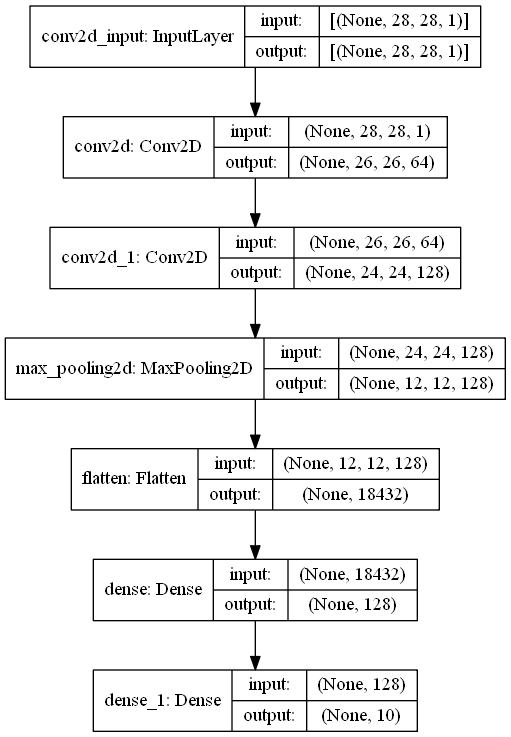

In [37]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png') # display the image


In [38]:
#compiling the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


 Adam  (Performs well in most models )-- This adjust the weights in the neural network as it runs.

- Loss function used by the optimizer in multi-classification network (0-9). For Binary classifications in keras use the 'binary_crossentropy' and for regression 'mean_squared_layer'

- Accuracy -- The way model is used for classification models

# Training and Evaluating the model

In [39]:
from tensorflow.keras.callbacks import TensorBoard
import time 

In [40]:
tensorboard_callback = TensorBoard(log_dir=f'.\\logs_nn\\mnist{time.time()}', histogram_freq=1, write_graph=True)

In [ ]:
# fit method is used
cnn.fit(x_train,y_train, epochs=5, batch_size=64, validation_split=0.1, callbacks=[tensorboard_callback])

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 428s 8ms/sample - loss: 0.1232 - acc: 0.9625 - val_loss: 0.0476 - val_acc: 0.9868
Epoch 2/5
54000/54000 [==============================] - 357s 7ms/sample - loss: 0.0373 - acc: 0.9886 - val_loss: 0.0497 - val_acc: 0.9873
Epoch 3/5
54000/54000 [==============================] - 404s 7ms/sample - loss: 0.0244 - acc: 0.9922 - val_loss: 0.0475 - val_acc: 0.9878
Epoch 4/5
54000/54000 [==============================] - 384s 7ms/sample - loss: 0.0145 - acc: 0.9955 - val_loss: 0.0430 - val_acc: 0.9887
Epoch 5/5
38080/54000 [====================>.........] - ETA: 2:56 - loss: 0.0094 - acc: 0.9966

a) epochs -- training the NN iteratively over time-- epoch -- process every training datset sample once.

b) Hyperparameter -- tuning 

c) batch-size - number of samples to process  at a time. 2 from 32, 512

d) Validation_split -- 0.1 -- each epoch model --  uses validation samples to make predictions. Displays the loass and the accuracy -- tune your layers -- and fit methods hyperparameters -- layers to compositions of the model.

* can specify seperate validation data with argument ,,, validate_data

In [ ]:
# Evaluating the model on unseen data using the evaluate method
loss, accuracy = cnn.evaluate(x_test,y_test)

In [ ]:
loss

In [ ]:
accuracy

# Making Predictions with the Model's Predict Method

In [ ]:
predictions = cnn.predict(x_test)

In [ ]:
y_test[50] # first digit is a seven

In [ ]:
for index, probability in enumerate(predictions[50]):
    print(f"{index}: {probability:.10%}")

In [ ]:
# Our model believes this digit is a seven is 100%
# Not all predictions have this level of accuracy

# Locating the incorrect Predictions

   We want to view incorrect predicted images -> so as to get a sense of digits that the model has troublr getting it right.
  * If the model is mispredicting like 3s then we need more 3s.
    Too determine whether a prediction was correct, compare the index with the largest probabilities in predictions[0] ---> the one that contains 1.
  If the indecies are the same then the prediction us correct.

   Reshape the samples from the shape(28,28,1), that keras needed back to matplotlip needs for displaying the images.

In [ ]:
images = x_test.reshape((10000,28,28))

In [ ]:
incorrect_prediction=[] # This is a list

In [ ]:
for i, (p,e) in enumerate(zip(predictions,y_test)):
    predicted, expected = np.argmax(p),np.argmax(e)
    if predicted != expected: # Predicted Incorrect
        incorrect_prediction.append((i,images[i],predicted, expected))

    P -- predicted value in the array and e is the expected.
    argmax -- determines the index of an array with highest value element.

In [ ]:
len(incorrect_prediction)

Display 24 elements 4 rows and 6 columns of incorrect imahes. Labled with each image index, predicted value, expected value. Before reading the expected values, look at each digit and write down what digit you think is. **Getting to know your data ** 
    

In [ ]:
figure, axes=plt.subplots(nrows=4, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrect_prediction):
    index, image,predicted,expected = item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([]) # Remove the x-axis ticks marks
    axes.set_yticks([]) # Remove the y-axis ticks marks
    axes.set_title(f'index: {index}\n p: {predicted};e {expected}')
plt.tight_layout()
    

# Display the probabilities for several incorrect predictions

In [ ]:
def display_probabilities (prediction):
    for index, probability in enumerate (prediction):
        print(f'{index}: {probability: 10%}')

In [ ]:
display_probabilities(predictions[1709])

# Saving and Loading the Model

* Save Model State
   - making more predictions
   - Training more
   - Training for new problems
   - Transfer Learning -- to a new model
   

In [ ]:
cnn.save('mnist_cnn.h5') # Stores the model architucture and state and in a hierarchial data format 

In [ ]:
# Load a saved model
from tensorflow.keras.models import load_model


In [ ]:
cnn=load_model('mnist_cnn.h5')

# Visualizing the NN Training with the TensorBoard

- On tensorboard -- view the data as you train or after training.

- scalars tab -- charts- see individual values that change over time-- ACC, traing loss -- loss, validation accuracy - val_acc, validataion loss - val_loss
- We will visualize a 10 epoch run for the MNIST Convnet .. 
- epochs and the displayed values on the x-axe starting from 0 for the first epoch and the acc and loss values are displayed on the y-axes.


In [ ]:
from tensorboard import notebook
notebook.list() 
notebook.display(port=6006, height=1000)

From 